## Heart Disease Analysis

**Intro**

Heart disease refers to conditions that affect the regular functions of the heart, stemming from several root causes. The most common cause is decreased blood flow to the heart, coronary artery disease (CAD), leading to heart attacks. Medical conditions including high blood pressure, diabetes, sleep apnea, and lifestyle risks such as long term unhealthy diets, not enough physical activities, overuse of tobacco and alcohol, stress, etc. can all lead to a higher risk of heart diseases. Many symptoms can indicate potential heart disease, such as high blood pressure, shortness of breath, etc.

Heart diseases are classified based on many elements. ST depression, serum cholesterol level, and resting blood pressure are all relevant attributes in predicting heart diseases. ST depression refers to the segment of the ECG slope below the baseline relative to the slope at rest. Serum cholesterol level measures the amount of cholesterol in the bloodstream, and resting blood pressure refers to the pressure of the arteries when blood is pumped into the heart. 

In this analysis, we will be predicting the diagnosis of heart disease (indicated by the percentage of narrowing of any major vessel of the heart, with above 50% being a positive diagnosis) based on measurements of ST depression, resting blood pressure, and serum cholesterol level, using the Heart Disease Data Set containing Hungarian heart disease patients’ medical conditions. 

__References:__

https://www.cdc.gov/heartdisease/about.htm

https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373


**Preliminary exploratory data analysis**

In [35]:
library(tidyverse)
library(dplyr)
library(readr)
library(tidymodels) 
options(repr.matrix.max.rows = 6)

In [36]:
#reading the file from the download url, then adding column names based on the data's webpage's specifications
heart_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data")
colnames(heart_data) = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
# adding the lost row of information to the dataset and converting varieties to factor
head(heart_data)

Warning message:
“Duplicated column names deduplicated: '2' => '2_1' [7], '0' => '0_1' [9], '0' => '0_2' [10], '?' => '?_1' [12], '?' => '?_2' [13], '0' => '0_3' [14]”
Parsed with column specification:
cols(
  `28` = col_double(),
  `1` = col_double(),
  `2` = col_double(),
  `130` = col_character(),
  `132` = col_character(),
  `0` = col_character(),
  `2_1` = col_character(),
  `185` = col_character(),
  `0_1` = col_character(),
  `0_2` = col_double(),
  `?` = col_character(),
  `?_1` = col_character(),
  `?_2` = col_character(),
  `0_3` = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0
32,1,2,110,225,0,0,184,0,0,?,?,?,0


In [37]:
#adding in the missing row of data that got wiped when they were replaced with column names
heart_data[nrow(heart_data) + 1,] = list(28, 1, 2, "130", "132", "0", "2", "185", "0", 0, "?", "?", "?", 0)
head(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0
32,1,2,110,225,0,0,184,0,0,?,?,?,0


In [38]:
# converting the "?" to NA
heart_data$trestbps <- gsub("?", NA, heart_data$trestbps, fixed = TRUE)
heart_data$chol <- gsub("?", NA, heart_data$chol, fixed = TRUE)
heart_data$fbs <- gsub("?", NA, heart_data$fbs, fixed = TRUE)
heart_data$restecg <- gsub("?", NA, heart_data$restecg, fixed = TRUE)
heart_data$thalach <- gsub("?", NA, heart_data$thalach, fixed = TRUE)
heart_data$exang <- gsub("?", NA, heart_data$exang, fixed = TRUE)
heart_data$slope <- gsub("?", NA, heart_data$slope, fixed = TRUE)
heart_data$ca <- gsub("?", NA, heart_data$ca, fixed = TRUE)
heart_data$thal <- gsub("?", NA, heart_data$thal, fixed = TRUE)
head(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0


In [39]:
#converting all chr columns to dbl columns
heart_data_clean <- heart_data %>% 
                        mutate(trestbps = as.numeric(trestbps)) %>% 
                        mutate(chol = as.numeric(chol)) %>% 
                        mutate(fbs = as.numeric(fbs)) %>% 
                        mutate(restecg = as.numeric(restecg)) %>% 
                        mutate(thalach = as.numeric(thalach)) %>% 
                        mutate(exang = as.numeric(exang)) %>% 
                        mutate(slope = as.numeric(slope)) %>% 
                        mutate(ca = as.numeric(ca)) %>% 
                        mutate(thal = as.numeric(thal)) 
head(heart_data_clean)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0


In [40]:
write_csv(heart_data_clean, "heart_data_clean.csv")

In [41]:
heart_data_fct <- heart_data_clean %>% 
                    mutate(sex = factor(sex, labels = c("female", "male"))) %>% #1 = male; 0 = female
                    mutate(cp = factor(cp, labels = c("typical angina", "atypical angina", "non-anginal pain", "asymptomatic"))) %>% #chest pain type -- 1: typical angina -- 2: atypical angina -- 3: non-anginal pain -- 4: asymptomatic
                    mutate(fbs = factor(fbs, labels = c("false", "true"))) %>% #if fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
                    mutate(restecg = factor(restecg, labels = c("normal", "abnormality", "hypertrophy"))) %>% #resting electrocardiographic results -- 0: normal -- 1: ST-T wave abnormality -- 2: probable or definite left ventricular hypertrophy
                    mutate(exang = factor(exang, labels = c("no", "yes"))) %>% #exercise induced angina (1 = yes; 0 = no)
                    mutate(slope = factor(slope, labels = c("upsloping", "flat", "downsloping"))) %>% #11. #41 (slope) the slope of the peak exercise ST segment -- 1 : upsloping -- 2: flat -- 3: downsloping
                    mutate(thal = factor(thal, labels = c("normal", "fixed", "reversible"))) %>% #3 = normal; 6 = fixed defect; 7 = reversable defect
                    mutate(num = factor(num, labels = c("less than 50", "more than 50"))) #diagnosis of heart disease (angiographic disease status) -- 0: < 50% diameter narrowing -- 1: > 50% diameter narrowing

colnames(heart_data_fct) = c("age", "sex", "chest_pain", "resting_pressure", "serum_chol", "fasting_blood_sugar", "resting_ecg", "max_heartrate", "exercise_angina", "oldpeak", "slope", "ca", "thal", "num")
heart_data_fct

age,sex,chest_pain,resting_pressure,serum_chol,fasting_blood_sugar,resting_ecg,max_heartrate,exercise_angina,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
29,male,atypical angina,120,243,false,normal,160,no,0,NA,NA,NA,less than 50
29,male,atypical angina,140,NA,false,normal,170,no,0,NA,NA,NA,less than 50
30,female,typical angina,170,237,false,abnormality,170,no,0,NA,NA,fixed,less than 50
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
58,female,atypical angina,180,393,false,normal,110,yes,1,flat,NA,reversible,more than 50
65,male,asymptomatic,130,275,false,abnormality,115,yes,1,flat,NA,NA,more than 50
28,male,atypical angina,130,132,false,hypertrophy,185,no,0,NA,NA,NA,less than 50


In [42]:
write_csv(heart_data_fct, "heart_data_fct.csv")

In [43]:
set.seed(9999)

In [44]:
#Split the data into training set and test set

heart_data_split <- initial_split(heart_data_fct, prop = 0.75, strata = chest_pain)
training_heart_data <- training(heart_data_split)
testing_heart_data <- testing(heart_data_split)
training_heart_data

age,sex,chest_pain,resting_pressure,serum_chol,fasting_blood_sugar,resting_ecg,max_heartrate,exercise_angina,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
29,male,atypical angina,120,243,false,normal,160,no,0,NA,NA,NA,less than 50
30,female,typical angina,170,237,false,abnormality,170,no,0,NA,NA,fixed,less than 50
31,female,atypical angina,100,219,false,abnormality,150,no,0,NA,NA,NA,less than 50
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
58,female,atypical angina,180,393,false,normal,110,yes,1,flat,NA,reversible,more than 50
65,male,asymptomatic,130,275,false,abnormality,115,yes,1,flat,NA,NA,more than 50
28,male,atypical angina,130,132,false,hypertrophy,185,no,0,NA,NA,NA,less than 50


In [45]:
#Summarize training data
summary(training_heart_data)

      age            sex                 chest_pain resting_pressure
 Min.   :28.00   female: 66   typical angina  : 6   Min.   : 98.0   
 1st Qu.:41.00   male  :156   atypical angina :79   1st Qu.:120.0   
 Median :48.00                non-anginal pain:42   Median :130.0   
 Mean   :47.73                asymptomatic    :95   Mean   :132.5   
 3rd Qu.:54.00                                      3rd Qu.:140.0   
 Max.   :65.00                                      Max.   :200.0   
                                                                    
   serum_chol    fasting_blood_sugar      resting_ecg  max_heartrate
 Min.   : 85.0   false:198           normal     :180   Min.   : 90  
 1st Qu.:211.0   true : 16           abnormality: 37   1st Qu.:125  
 Median :246.0   NA's :  8           hypertrophy:  5   Median :140  
 Mean   :252.6                                         Mean   :140  
 3rd Qu.:284.0                                         3rd Qu.:155  
 Max.   :603.0                    

In [46]:
avg_training_heart_data <- training_heart_data %>%
                                 select(age, resting_pressure, serum_chol, max_heartrate, oldpeak, ca) %>%
                                 map_df(mean, na.rm = TRUE)
#Dataframe that contains: Average of all numerical variables

max_training_heart_data <- training_heart_data %>%
                                 select(age, resting_pressure, serum_chol, max_heartrate, oldpeak, ca) %>%
                                 map_df(max, na.rm = TRUE)
#Dataframe that contains: Maximum of all numerical variables

min_training_heart_data <- training_heart_data %>%
                                 select(age, resting_pressure, serum_chol, max_heartrate, oldpeak, ca) %>%
                                 map_df(min, na.rm = TRUE)
#Dataframe that contains: Minimum of all numerical variables

table_dbl <- rbind(avg_training_heart_data, max_training_heart_data, min_training_heart_data) 
df <- data.frame(summary = c('average','max','min'))
table_dbl <- cbind(df, table_dbl)
table_dbl
#Summarize numerical variables in a table

summary,age,resting_pressure,serum_chol,max_heartrate,oldpeak,ca
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
average,47.73423,132.473,252.5805,139.964,0.6216216,0
max,65.00000,200.000,603.0000,190.000,5.0000000,0
min,28.00000,98.000,85.0000,90.000,0.0000000,0


In [47]:
#Summarize number of observations of each categorical variable

num_obs_cp <- training_heart_data %>%
              group_by(chest_pain) %>%
              summarize(n = n())
num_obs_cp  

num_obs_sex <- training_heart_data %>%
              group_by(sex) %>%
              summarize(n = n())
num_obs_sex

num_obs_fasting_blood_sugar <- training_heart_data %>%
              group_by(fasting_blood_sugar) %>%
              summarize(n = n())
num_obs_fasting_blood_sugar

num_obs_resting_ecg <- training_heart_data %>%
              group_by(resting_ecg) %>%
              summarize(n = n())
num_obs_resting_ecg

num_obs_exercise_angina <- training_heart_data %>%
              group_by(exercise_angina) %>%
              summarize(n = n())
num_obs_exercise_angina

num_obs_slope <- training_heart_data %>%
              group_by(slope) %>%
              summarize(n = n())
num_obs_slope

num_obs_thal <- training_heart_data %>%
              group_by(thal) %>%
              summarize(n = n())
num_obs_thal

num_obs_num <- training_heart_data %>%
              group_by(num) %>%
              summarize(n = n())
num_obs_num

`summarise()` ungrouping output (override with `.groups` argument)



chest_pain,n
<fct>,<int>
typical angina,6
atypical angina,79
non-anginal pain,42
asymptomatic,95


`summarise()` ungrouping output (override with `.groups` argument)



sex,n
<fct>,<int>
female,66
male,156


`summarise()` ungrouping output (override with `.groups` argument)



fasting_blood_sugar,n
<fct>,<int>
false,198
true,16
NA,8


`summarise()` ungrouping output (override with `.groups` argument)



resting_ecg,n
<fct>,<int>
normal,180
abnormality,37
hypertrophy,5


`summarise()` ungrouping output (override with `.groups` argument)



exercise_angina,n
<fct>,<int>
no,153
yes,69


`summarise()` ungrouping output (override with `.groups` argument)



slope,n
<fct>,<int>
upsloping,9
flat,71
downsloping,1
NA,141


`summarise()` ungrouping output (override with `.groups` argument)



thal,n
<fct>,<int>
normal,5
fixed,7
reversible,8
NA,202


`summarise()` ungrouping output (override with `.groups` argument)



num,n
<fct>,<int>
less than 50,139
more than 50,83


In [48]:
#missing data

miss_obs_row <- nrow(na.omit(training_heart_data))
miss_obs_row 

miss_obs_column <- training_heart_data %>%
                   map_df(~sum(is.na(.)))
miss_obs_column

[1] 1

age,sex,chest_pain,resting_pressure,serum_chol,fasting_blood_sugar,resting_ecg,max_heartrate,exercise_angina,oldpeak,slope,ca,thal,num
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,17,8,0,0,0,0,141,221,202,0


In [49]:
#Summarize number of observations of each category
#Should not use ca, slope, thal since most of the observations from these three variables have NAs.

In [50]:
#Forward selection
#Since 221 out of 222 observations are missing for the ca column (Number of major vessels (0-3) colored by flourosopy), we will not choose it 
#as a predictor.

heart_subset <- training_heart_data %>%
                filter(!is.na(serum_chol))%>%
                select(num, age, resting_pressure, serum_chol, max_heartrate, oldpeak)

names <- colnames(heart_subset %>% select(-num))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

# create a 5-fold cross-validation object
heart_vfold <- vfold_cv(heart_subset, v = 5, strata = num)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("num", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_recipe <- recipe(as.formula(model_string), data = heart_subset) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K

        acc <- workflow() %>%
          add_recipe(heart_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = heart_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>%
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,num ~ oldpeak,0.7706852
2,num ~ oldpeak+max_heartrate,0.8093554
3,num ~ oldpeak+max_heartrate+serum_chol,0.7951974
4,num ~ oldpeak+max_heartrate+serum_chol+resting_pressure,0.7995993
5,num ~ oldpeak+max_heartrate+serum_chol+resting_pressure+age,0.7860337


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



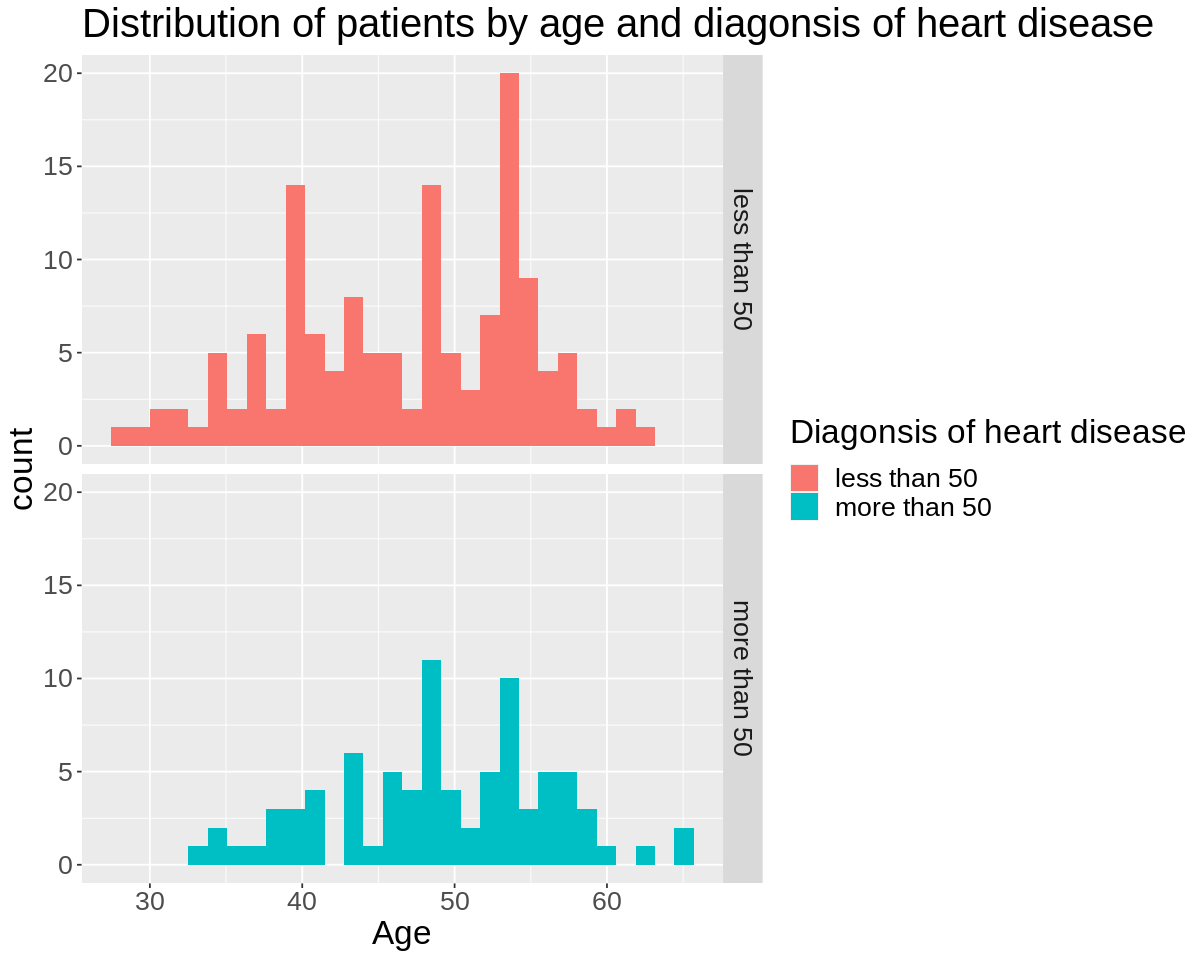

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 17 rows containing non-finite values (stat_bin).”


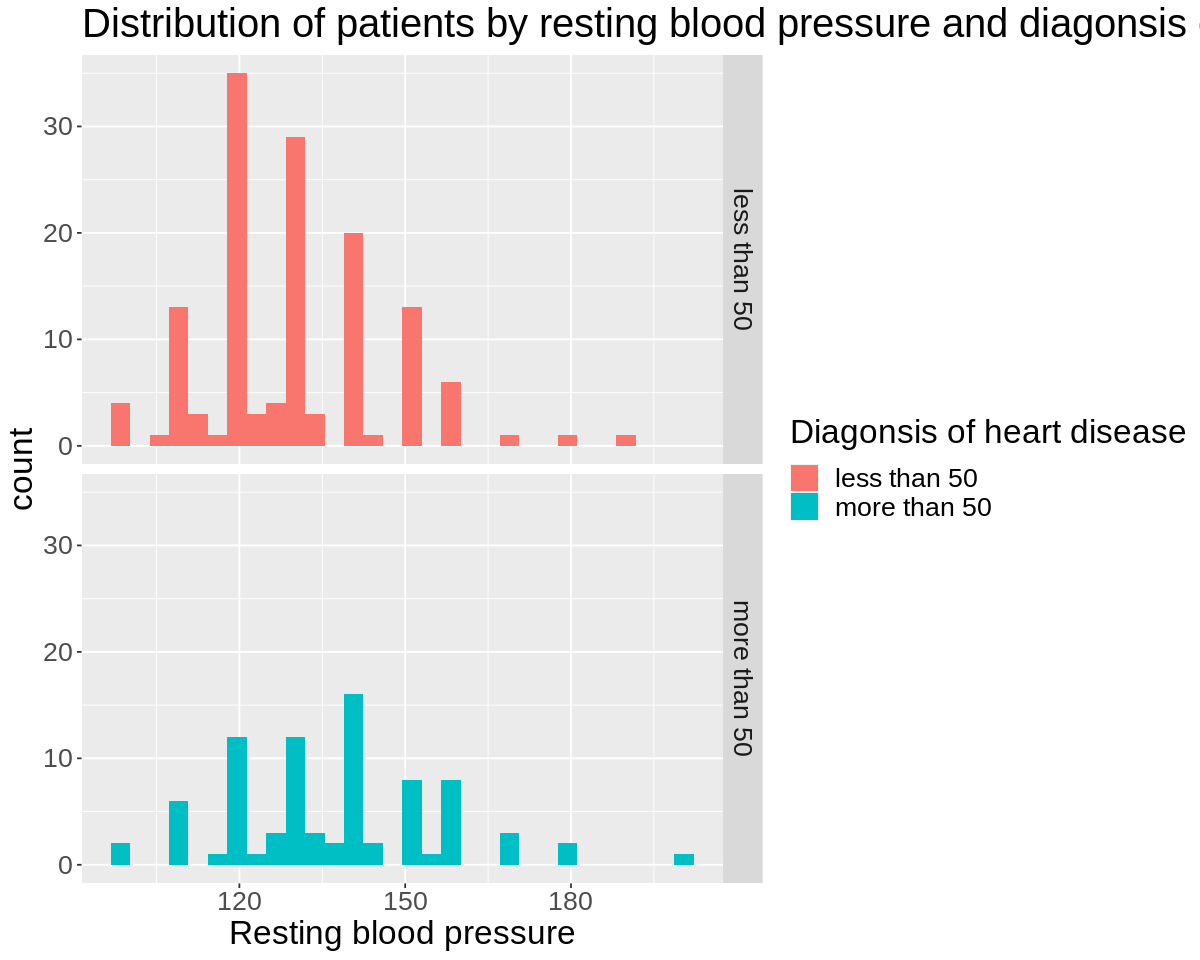

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



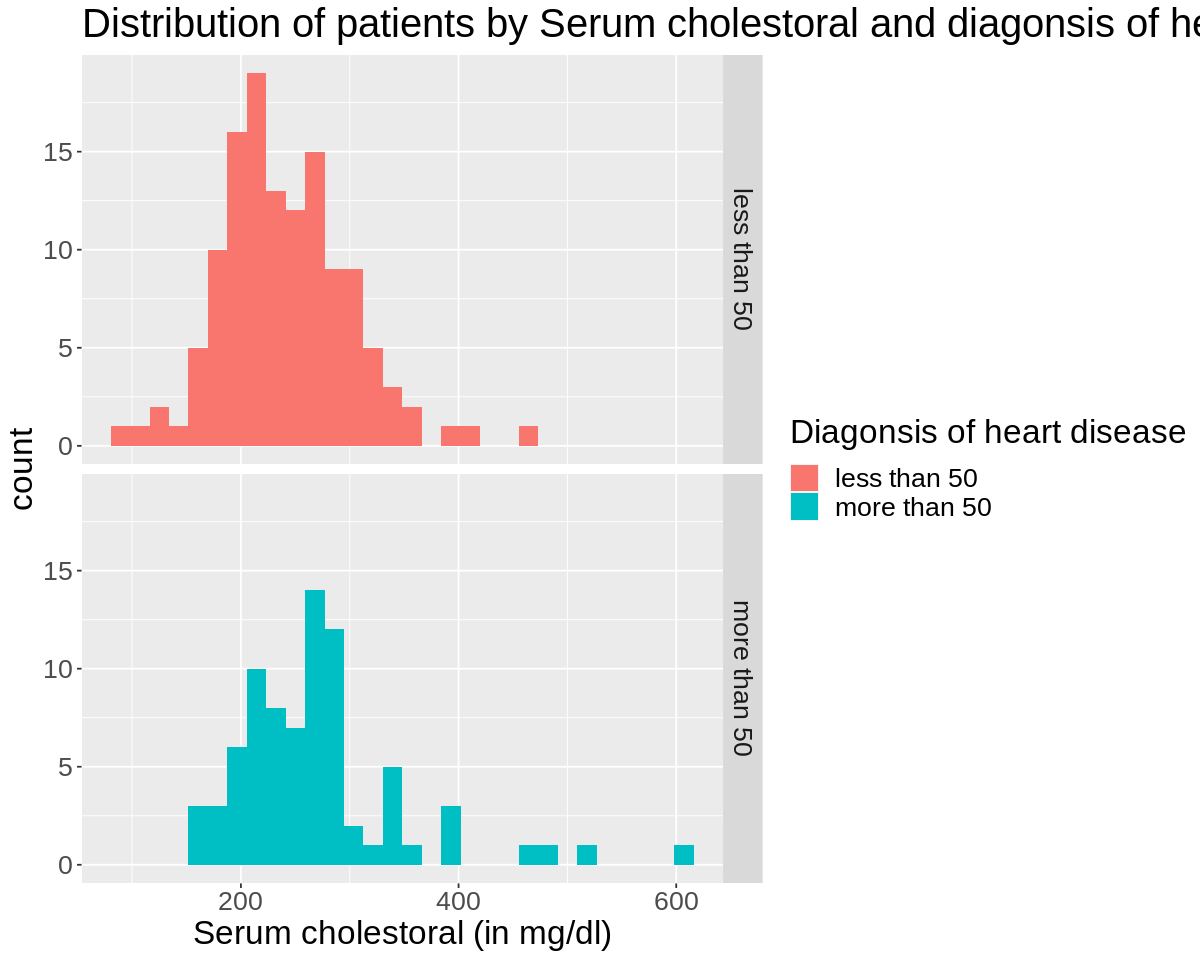

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



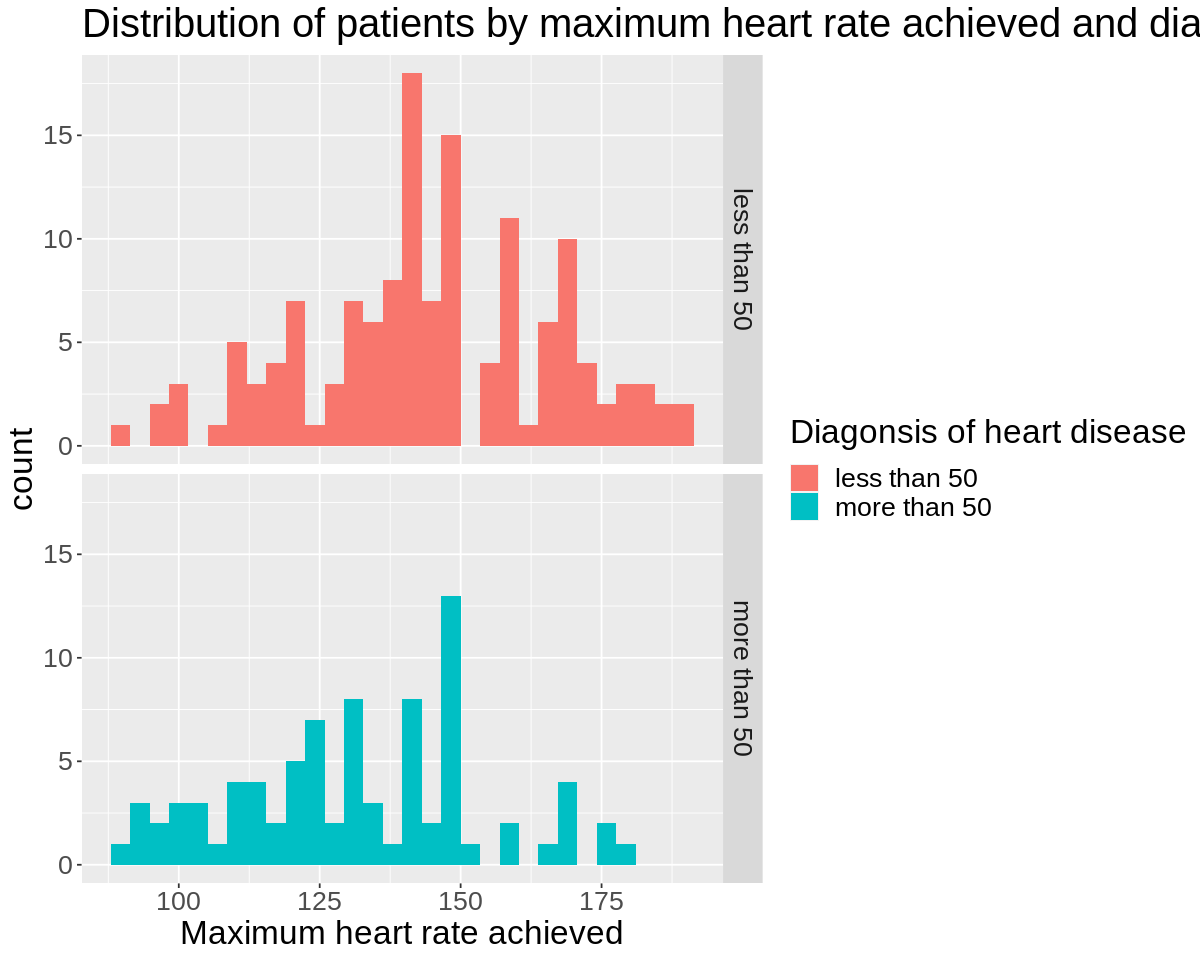

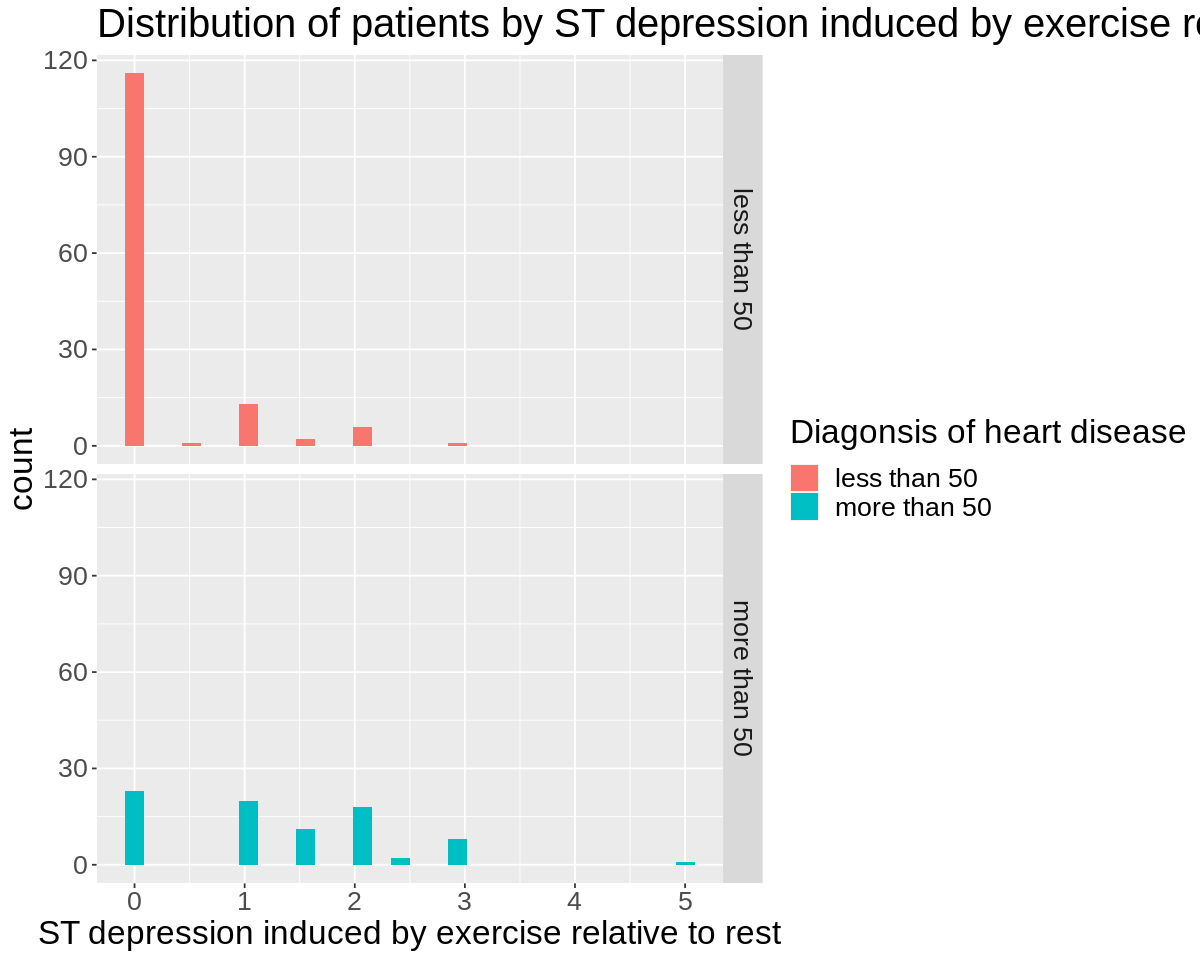

In [51]:
#Visualization
options(repr.plot.height = 8, repr.plot.width = 10)
distribution_age_plot <- training_heart_data %>%
                         select(age, num) %>%
                         ggplot(aes(x = age, fill = num)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Age', fill = 'Diagonsis of heart disease') +
                         ggtitle('Distribution of patients by age and diagonsis of heart disease') +
                         facet_grid(num ~.) +
                         theme(text = element_text(size = 20))
                          
distribution_age_plot

distribution_rp_plot <- training_heart_data %>%
                         select(resting_pressure, num) %>%
                         ggplot(aes(x = resting_pressure, fill = num)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Resting blood pressure', fill = 'Diagonsis of heart disease') +
                         ggtitle('Distribution of patients by resting blood pressure and diagonsis of heart disease') +
                         facet_grid(num ~.) +
                         theme(text = element_text(size = 20))
distribution_rp_plot

distribution_sc_plot <- training_heart_data %>%
                         select(serum_chol, num) %>%
                         ggplot(aes(x = serum_chol, fill = num)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Serum cholestoral (in mg/dl)', fill = 'Diagonsis of heart disease') +
                         ggtitle('Distribution of patients by Serum cholestoral and diagonsis of heart disease') +
                         facet_grid(num ~.) +
                         theme(text = element_text(size = 20))
distribution_sc_plot

distribution_mhr_plot <- training_heart_data %>%
                         select(max_heartrate, num) %>%
                         ggplot(aes(x = max_heartrate, fill = num)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Maximum heart rate achieved', fill = 'Diagonsis of heart disease') +
                         ggtitle('Distribution of patients by maximum heart rate achieved and diagonsis of heart disease') +
                         facet_grid(num ~.) +
                         theme(text = element_text(size = 20))
distribution_mhr_plot

distribution_op_plot <- training_heart_data %>%
                         select(oldpeak, num) %>%
                         ggplot(aes(x = oldpeak, fill = num)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'ST depression induced by exercise relative to rest', fill = 'Diagonsis of heart disease') +
                         ggtitle('Distribution of patients by ST depression induced by exercise relative to rest and diagonsis of heart disease') +
                         facet_grid(num ~.) +
                         theme(text = element_text(size = 20))
distribution_op_plot

**Summary on the histograms**

Histograms are constructed to show the distribution of each potential predictor. An obvious difference in the distribution is observed in the histograms of "resting blood pressure," "ST depression by exercise compared with resting," and "serum cholesterol testosterone." The difference between the distributions may suggest that these three variables could be used to predict the presence of heart disease in a patient.

Warning message:
“Removed 17 rows containing missing values (geom_point).”


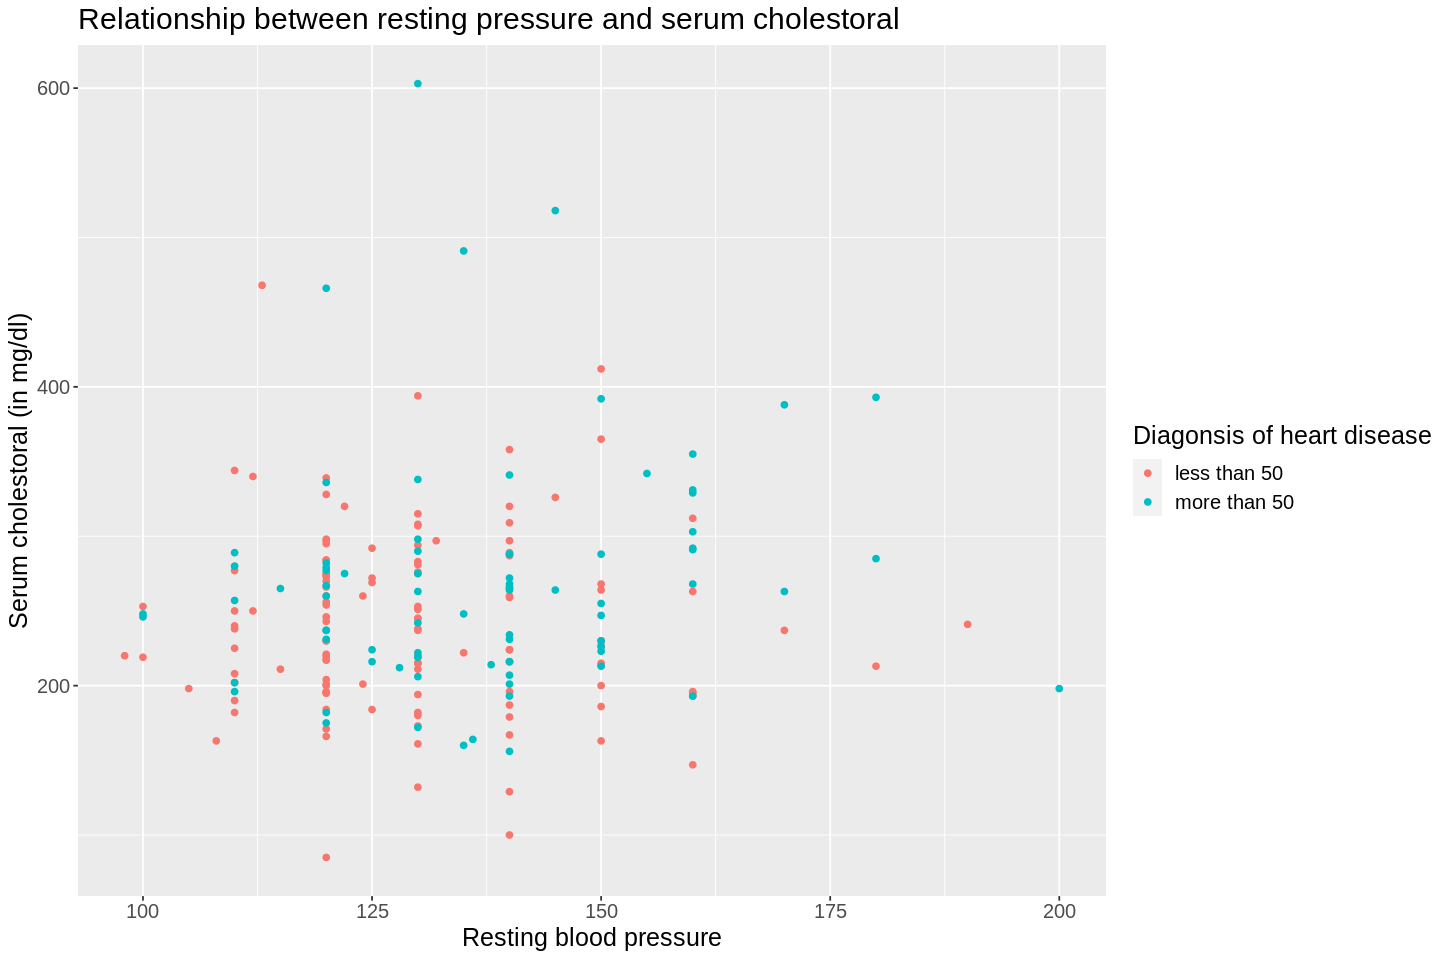

Warning message:
“Removed 17 rows containing missing values (geom_point).”


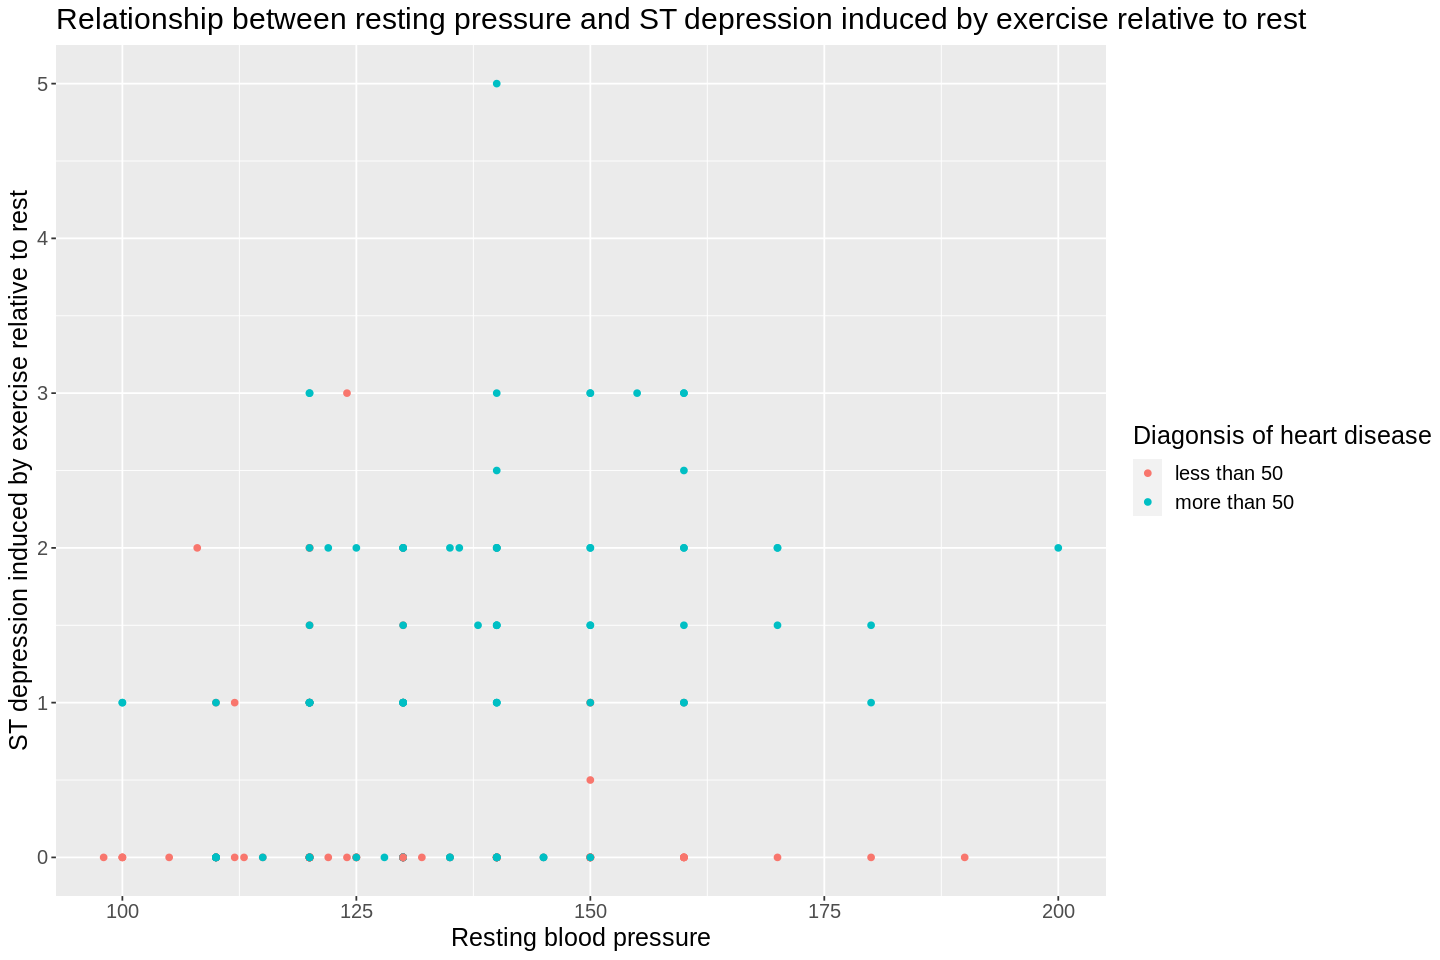

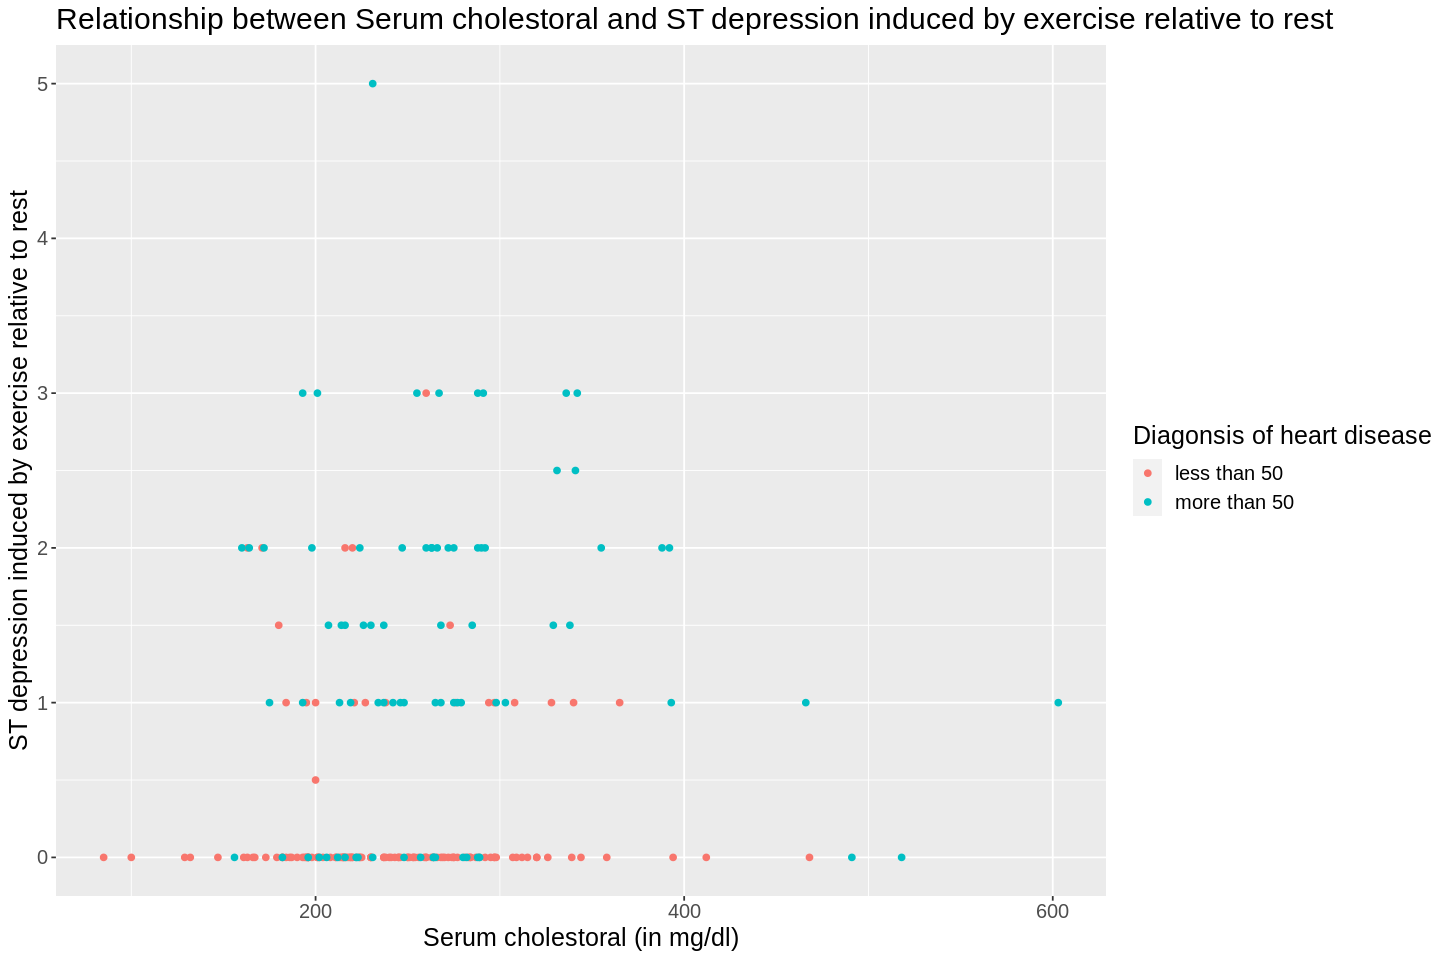

In [52]:
options(repr.plot.height = 8, repr.plot.width = 12)


rp_vs_sc <- training_heart_data %>%
                         select(serum_chol, resting_pressure, num) %>%
                         ggplot(aes(x = resting_pressure, y = serum_chol, color = num)) +
                         geom_point() +
                         labs(x = 'Resting blood pressure', y = 'Serum cholestoral (in mg/dl)', color = 'Diagonsis of heart disease') +
                         ggtitle('Relationship between resting pressure and serum cholestoral') +
                         theme(text = element_text(size = 15))
rp_vs_sc

rp_vs_op <- training_heart_data %>%
                         select(resting_pressure, oldpeak, num) %>%
                         ggplot(aes(x = resting_pressure, y = oldpeak, color = num)) +
                         geom_point() +
                         labs(x = 'Resting blood pressure', y = 'ST depression induced by exercise relative to rest', color = 'Diagonsis of heart disease') +
                         ggtitle('Relationship between resting pressure and ST depression induced by exercise relative to rest') +
                         theme(text = element_text(size = 15))
rp_vs_op

sc_vs_op <- training_heart_data %>%
                         select(serum_chol, oldpeak, num) %>%
                         ggplot(aes(x = serum_chol, y = oldpeak, color = num)) +
                         geom_point() +
                         labs(x = 'Serum cholestoral (in mg/dl)', y = 'ST depression induced by exercise relative to rest', color = 'Diagonsis of heart disease') +
                         ggtitle('Relationship between Serum cholestoral and ST depression induced by exercise relative to rest') +
                         theme(text = element_text(size = 15))
sc_vs_op



**Summary on the scatterplots**

Scatter plots showing that there is a weak correlation between resting blood pressure (resting blood pressure) and serum chol (serum cholesterol in mg/dl). There is no obvious correlation between "resting pressure vs serum chol" and "serum chol vs oldpeak" (ST lowering by exercise compared with rest). However, these two scatter plots clearly show that patients without heart disease have a low oldpeak, whereas patients with heart disease have a higher oldpeak.


**Methods**

By selecting num (diagnosis of heart disease), ST depression, serum cholesterol level, and resting blood pressure, we will be conducting a K-nearest neighbors classification model to the existence of a diagnosis from different values of these variables. Forward selection shows that using oldpeak, serum_chol, and resting_pressure to predict num yields the highest estimated accuracy; therefore, using these three variables as predictors is more likely to accurately predict diagnosis of heart disease. We will split the data into training and testing sets, then complete the cross validation process for a value of K to be chosen to maximize validation accuracy. K will be retrained using only the training set, and give a final prediction. The data will be visualized with a scatter plot with different colors/shapes to differentiate the presence of heart disease, as well as a line graph to figure out which K is most accurate. As well, workflows and tibbles will be used to represent numerical data and ensure the reader follows the steps and calculations used for the prediction. 


**Expected outcomes and significance**

From our analysis, we expect to predict the diagnosis of heart diseases, which is indicated by the percentage of narrowing of any major vessel of the heart, based on ST depression, serum cholesterol level, and resting blood pressure. The impact of this analysis is that it is much easier to predict diagnosis of heart disease using data rather than conducting a measurement of the artery’s narrowing, which is a big step in accessibility of diagnoses since it would be possible to give the necessary treatment to people with this disease who may not have the means to get their vessels’ narrowing measured. This analysis could possibly lead to questions such as will the symptoms that indicate heart disease lead to a diagnosis of other diseases? As well, what other easier accessed measurements can be used when diagnosing heart diseases to further simplify the process.